In [21]:
import numpy as np

def sigmoid(x):
    return (1/1+np.exp(-x))

def softmax(x):
    max_x = np.max(x)
    x = x - max_x
    exp_x = np.exp(x)
    sum_exp = np.sum(exp_x)
    return exp_x/sum_exp


    
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = a3
    
    return z3
z = softmax(np.array([1010, 1000, 990]))
print(np.sum(z))

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

1.0
[0.45514155 1.04806802]


In [40]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

def init_network():
    with open("./dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
print ("x:", len(x), "t: ", len(t))
accuracy_cnt = 0
print(network['b1'])
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print(accuracy_cnt)
print(len(x))
print("accuacy rate is %f" % (float(accuracy_cnt)/len(x)))

x: 10000 t:  10000
[-0.06750315  0.0695926  -0.02730473  0.02256093 -0.22001474 -0.22038847
  0.04862635  0.13499236  0.23342554 -0.0487357   0.10170191 -0.03076038
  0.15482435  0.05212503  0.06017235 -0.03364862 -0.11218343 -0.26460695
 -0.03323386  0.13610415  0.06354368  0.04679805 -0.01621654 -0.05775835
 -0.03108677  0.10366164 -0.0845938   0.11665157  0.21852103  0.04437255
  0.03378392 -0.01720384 -0.07383765  0.16152057 -0.10621249 -0.01646949
  0.00913961  0.10238428  0.00916639 -0.0564299  -0.10607515  0.09892716
 -0.07136887 -0.06349134  0.12461706  0.02242282 -0.00047972  0.04527043
 -0.15179175  0.10716812]
980
10000
accuacy rate is 0.098000


In [39]:
import pickle
def get_data():
    # 0〜255の値の範囲を0.0〜1.0に正規化させる
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # 学習された重みパラメータをロード。
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
print(network['W1'].shape) # (784, 50) 1차원 배열로 reshape된 784(이미지의 크기 28x28)개의 입력, 첫번째 히든 레이어 50 
print(network['b1'].shape) # 첫번째 히든 레이어에 대한 가중치
print(network['W2'].shape) # (50, 100) 첫번째 히든 레이어 50개의 뉴런에서 두번째 히든 레이어 100개의 뉴런에 전달 
print(network['b2'].shape) # ... 이하 생략 
print(network['W3'].shape) # ...
print(network['b3'].shape) # ...

print ("x:", len(x), "t: ", len(t))
accuracy_cnt = 0
print(network['b1'])
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print(accuracy_cnt)
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
x: 10000 t:  10000
[-0.06750315  0.0695926  -0.02730473  0.02256093 -0.22001474 -0.22038847
  0.04862635  0.13499236  0.23342554 -0.0487357   0.10170191 -0.03076038
  0.15482435  0.05212503  0.06017235 -0.03364862 -0.11218343 -0.26460695
 -0.03323386  0.13610415  0.06354368  0.04679805 -0.01621654 -0.05775835
 -0.03108677  0.10366164 -0.0845938   0.11665157  0.21852103  0.04437255
  0.03378392 -0.01720384 -0.07383765  0.16152057 -0.10621249 -0.01646949
  0.00913961  0.10238428  0.00916639 -0.0564299  -0.10607515  0.09892716
 -0.07136887 -0.06349134  0.12461706  0.02242282 -0.00047972  0.04527043
 -0.15179175  0.10716812]


/Users/JH/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  
/Users/JH/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in subtract
  


1438
Accuracy:0.1438


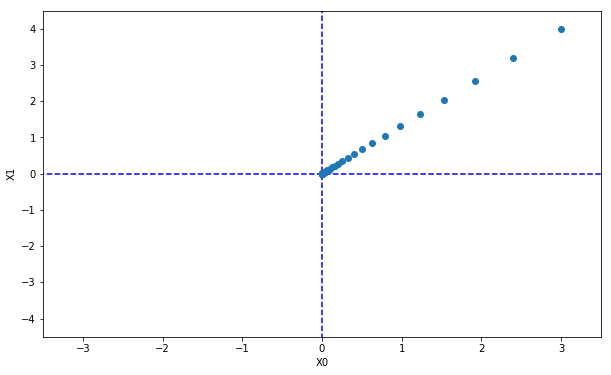

In [105]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

def function(x):
    return 0.01*x**2 + 0.1*x

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(len(x)):
        tmp = x[i]
        x[i] = tmp + h
        f1 = f(x)
        
        x[i] = tmp - h
        f2 = f(x)
        
        grad[i] = (f1-f2)/(2*h)
        x[i] = tmp
        
    return grad

def gradient_descent(f, init_x, lr=0.1, step_num=100):
    x = init_x
    lis = []
    for i in range(step_num):
        lis.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr*grad
        lis.append(x)
    return np.array(lis)

def function_2(x):
    return np.sum(np.square(x))

import matplotlib.pyplot as plt

x_history = gradient_descent(function_2, np.array([3.0, 4.0]))
plt.figure(figsize=(10,6))
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
    

In [71]:
import sys, os
sys.path.append(os.pardir)
import numpy as np


array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

/Users/JH/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[-inf, -inf],
       [-inf, -inf],
       [-inf, -inf],
       [-inf, -inf]])

In [81]:
a[np.arange(3), [0,1,2]]

array([1, 0, 1])

In [110]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads